In [2]:
# Import librarys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score,accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Load the dataset
df = pd.read_csv('ds_salaries.csv')

df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
# Data preprocessing

# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['experience_level','employment_type',
                    'salary_currency','employee_residence','company_location','company_size']
for col in categorical_cols:
  df[col] = label_encoder.fit_transform(df[col])

In [6]:
# Encode job_title seprately for seeing the lables and numbers

# Fit the LabelEncoder on the job_title column
label_encoder.fit(df['job_title'])

# Get the encoded labels
df['job_title'] = label_encoder.transform(df['job_title'])

# Get the original labels from the classes_ attribute
original_labels = label_encoder.classes_

# Print the encoded labels with their corresponding original labels
k=0
for encoded_label, original_label in zip(df['job_title'], original_labels):
    k= k+1
    if(k%3==0):
      print(f"{original_label} : {encoded_label}")
    print(f"{original_label} : {encoded_label}",end='|')

3D Computer Vision Researcher : 84|AI Developer : 66|AI Programmer : 66
AI Programmer : 66|AI Scientist : 47|Analytics Engineer : 47|Applied Data Scientist : 8
Applied Data Scientist : 8|Applied Machine Learning Engineer : 8|Applied Machine Learning Scientist : 47|Applied Scientist : 47
Applied Scientist : 47|Autonomous Vehicle Technician : 47|Azure Data Engineer : 47|BI Analyst : 25
BI Analyst : 25|BI Data Analyst : 25|BI Data Engineer : 8|BI Developer : 8
BI Developer : 8|Big Data Architect : 38|Big Data Engineer : 38|Business Data Analyst : 47
Business Data Analyst : 47|Business Intelligence Engineer : 47|Cloud Data Architect : 25|Cloud Data Engineer : 25
Cloud Data Engineer : 25|Cloud Database Engineer : 88|Compliance Data Analyst : 88|Computer Vision Engineer : 4
Computer Vision Engineer : 4|Computer Vision Software Engineer : 4|Data Analyst : 18|Data Analytics Consultant : 18
Data Analytics Consultant : 18|Data Analytics Engineer : 69|Data Analytics Lead : 69|Data Analytics Manag

In [7]:
# Calculate the Z-scores of each column and Remove rows with outliers
z_scores = stats.zscore(df)
df = df[(z_scores < 3).all(axis=1)]

df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


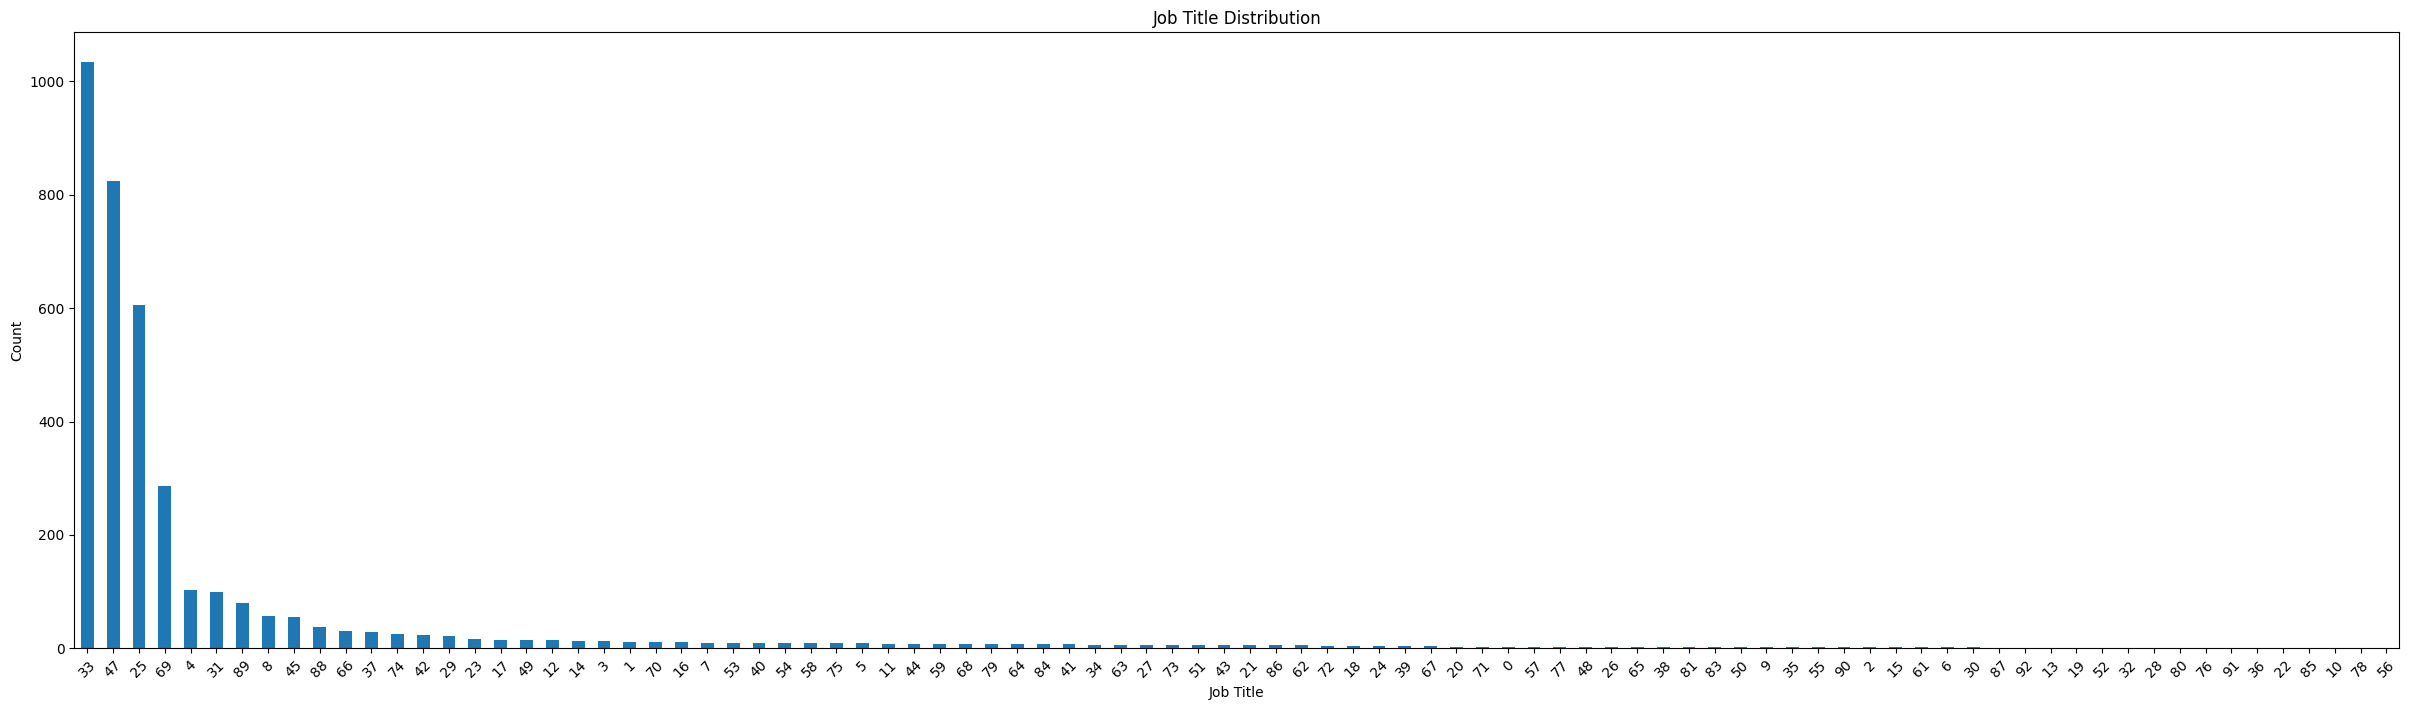

In [8]:
# Count the occurrences of each job title
job_title_counts = df['job_title'].value_counts()

# Plot the bar chart
plt.figure(figsize=(30, 8))
job_title_counts.plot(kind='bar')
plt.title('Job Title Distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

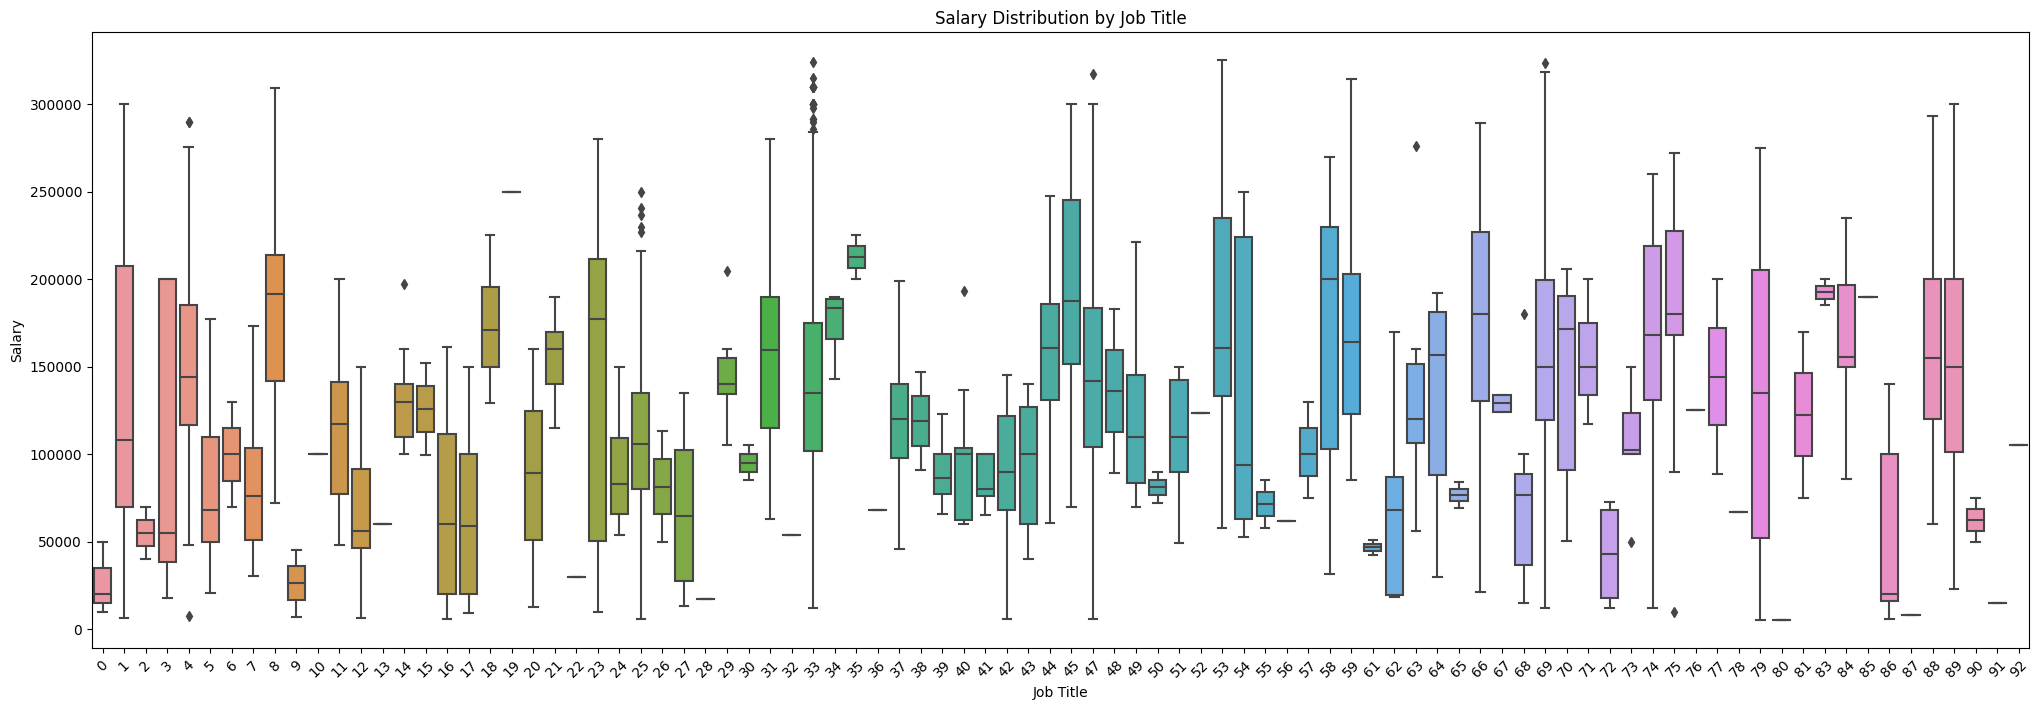

In [9]:
# Create a box plot of salaries by job title
plt.figure(figsize=(25, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Separate the features (X) and target variable (y)
X = df.drop('job_title', axis=1)
y = df['job_title']

# Data preprocessing
# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shape ofthe sets
print(f'shape of the Dataset: {df.shape}')
print('--------------------------')
print(f'shape of the x-train: {X_train.shape}')
print(f'shape of the y-train: {y_train.shape}')
print(f'shape of the x-val: {X_test.shape}')
print(f'shape of the y-val: {y_test.shape}')

shape of the Dataset: (3691, 11)
--------------------------
shape of the x-train: (2952, 10)
shape of the y-train: (2952,)
shape of the x-val: (739, 10)
shape of the y-val: (739,)


In [23]:
# Train the decision tree model with max_depth=2
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_tree = decision_tree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {dtree_accuracy}")

Decision Tree Accuracy: 0.29093369418132614


In [24]:
# Extract leaf node data and labels
leaf_node_indices = decision_tree.apply(X_train)
leaf_node_data = []
leaf_node_labels = []

for leaf_node_index in np.unique(leaf_node_indices):
    mask = (leaf_node_indices == leaf_node_index)
    leaf_node_data.append(X_train[mask])
    leaf_node_labels.append(y_train[mask])

# Combine leaf node data and labels
combined_data = []
combined_labels = []

for data, labels in zip(leaf_node_data, leaf_node_labels):
    combined_data.extend(data)
    combined_labels.extend(labels)

In [25]:
# Train KNN model on combined leaf node data
knn_model = KNeighborsClassifier()
knn_model.fit(combined_data, combined_labels)

y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy}",)

KNN Accuracy: 0.33152909336941816
